# Chapter 1 Working with Data

## useful resources:
1. [RDatasets in CSV](https://github.com/vincentarelbundock/Rdatasets)
    

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt

### [Yearly Sunspot Data, 1700–1988](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/sunspot.year.html)
Description
Yearly 
> numbers of sunspots from 1700 to 1988 (rounded to one digit).

> Note that monthly numbers are available as sunspot.month, though starting slightly later.

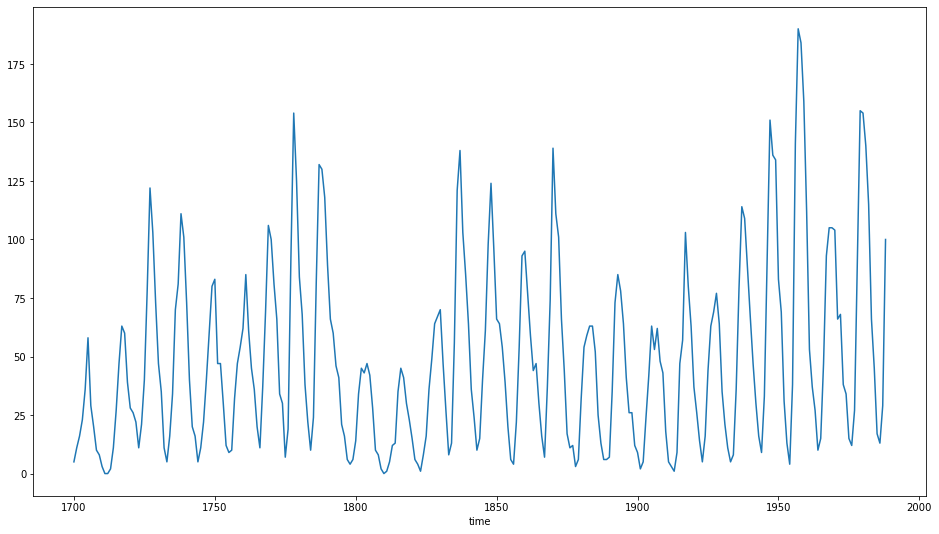

In [116]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sunspot.year.csv"
sunspot = pd.read_csv(
    url, delimiter=',', index_col=0, usecols=[1, 2]
).astype(int)
# sunspot.index = sunspot.index.astype(int)
sunspot.sort_index(inplace=True)

sunspot['peak'] = sunspot.value == sunspot.value.rolling(6, min_periods=1).max().shift(-3)
sunspot.loc[sunspot.peak & sunspot.peak.shift(1), 'peak'] = False # set repeat max years to not peak
sunspots.plot(figsize=(16, 9));


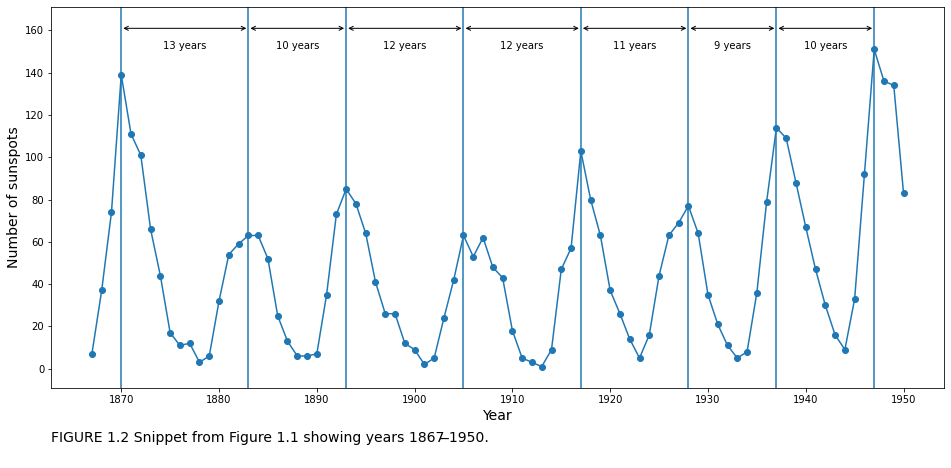

In [117]:
sunspot = sunspot.loc[1867:1950, ['value', 'peak']]
ymin, ymax = sunspot['value'].min()-10, sunspot['value'].max()+20
arrow_y = ymax - 10

fig, ax = plt.subplots(figsize=(16,7))
ax.plot(sunspot['value'], marker='o')

peak_years = sunspot[sunspot.peak].index
for idx in range(len(peak_years)):
    year = peak_years[idx]
    ax.vlines(year, ymin, ymax)
    if idx < len(peak_years)-1:
        next_year = peak_years[idx+1]
        ax.annotate("", xy=(year, arrow_y), xytext=(next_year, arrow_y), arrowprops=dict(facecolor='black', arrowstyle="<->"))
        ax.text((next_year-year)/2 + year, arrow_y-10, f"{next_year-year} years", ha='center')
        
ax.set_title('FIGURE 1.2 Snippet from Figure 1.1 showing years 1867 ̶1950.\n', size=14, loc='left', y=-.2)
ax.set_ybound(ymin, ymax)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Number of sunspots', size=14)
ax.set_xticks(np.arange(1870, 1951, 10))
plt.show()

### National Weather Service
This is a website published by the National Weather Service that provides an abundance of information about local forecasts and historical data at www.weather.gov. The monthly average temperature in Dallas Ft. Worth (DFW) from September 1898 through the current month can be obtained from the link www.weather.gov/fwd/dmotemp . In `tswge` here are two files obtained from this link:

- (a) dfw.mon: DFW monthly average temperatures from January 1900 through December 2020. 
> Note: These data are plotted in Figure 1.3.
- (b) dfw.yr: DFW average annual temperatures from 1900 through 2020.

In [118]:
# Read HTML tables into a ``list`` of ``DataFrame`` objects.
url = "https://www.weather.gov/fwd/dmotemp"
dfw = pd.read_html(url, index_col=0)[0].stack().reset_index()
dfw.columns = ['year', 'month', 'Fahrenheit']
# Fahrenheit to Celsius
dfw['Celsius'] = 5 * (dfw.Fahrenheit - 32) / 9
dfw.head()

,year,month,Fahrenheit,Celsius
0,2022,Jan,45.8,7.666667
1,2022,Feb,46.2,7.888889
2,2022,Mar,58.5,14.722222
3,2022,Apr,69.5,20.833333
4,2022,May,77.9,25.500000


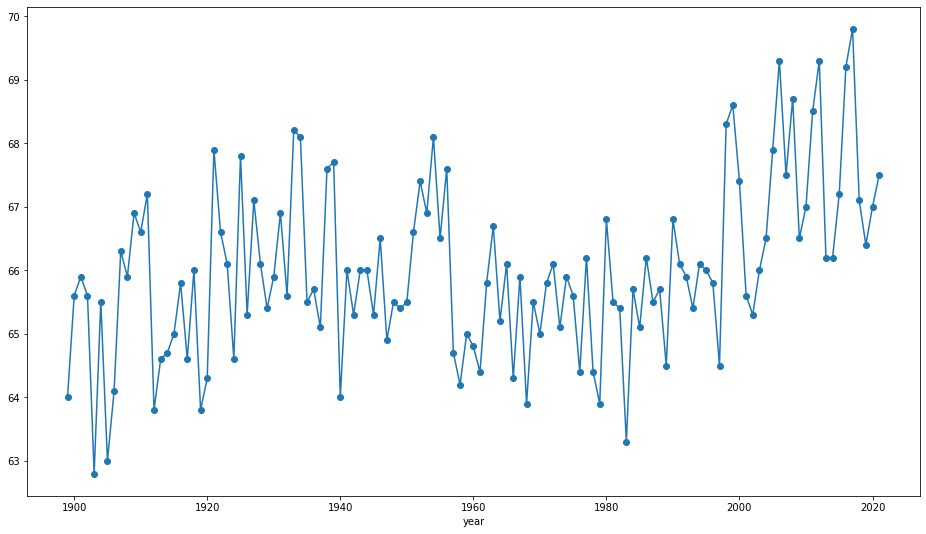

In [119]:
dfw_year = dfw[dfw.month=='Total'].set_index('year')['Fahrenheit']
dfw_year.plot(marker='o', figsize=(16, 9));

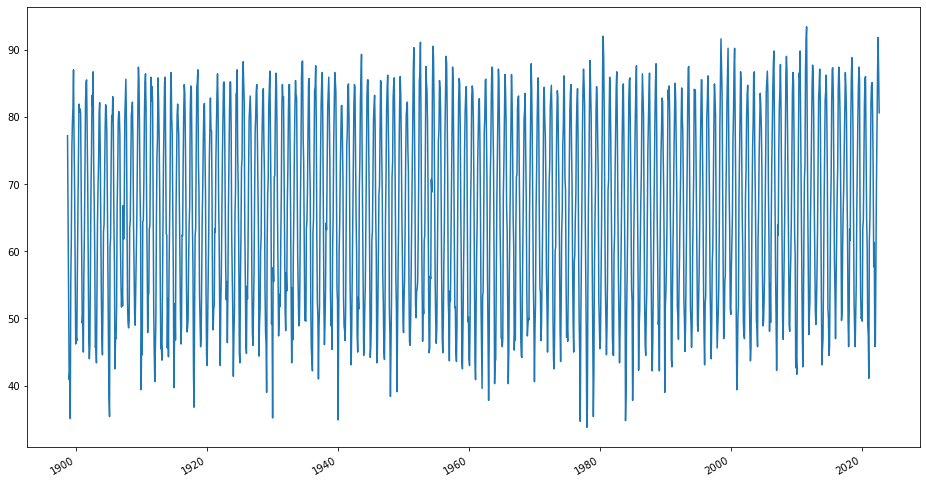

In [120]:
dfw_mon = dfw[dfw.month!='Total'].set_index(['year', 'month'])['Fahrenheit']
dfw_mon.index = pd.to_datetime([f"{m}, {y}" for y, m in dfw_mon.index])
dfw_mon.plot(figsize=(16, 9));

### Monthly Airline Passenger Numbers 1949-1960

Description
>The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.

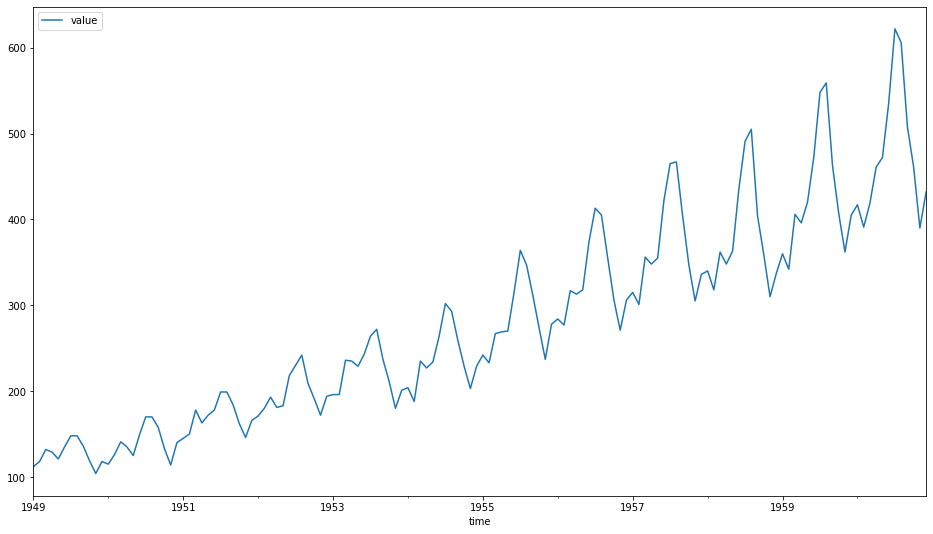

In [219]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/AirPassengers.csv"
df = pd.read_csv(url, usecols=[1, 2], index_col=0)
year = df.index.astype(int).astype(str)
diff = df.index - np.trunc(df.index)
month = (diff * 12 + 1.5).astype(int).astype(str)
df.index = pd.to_datetime(year+'-'+month)
df.plot(figsize=(16, 9));

### Dealing With Missing Date

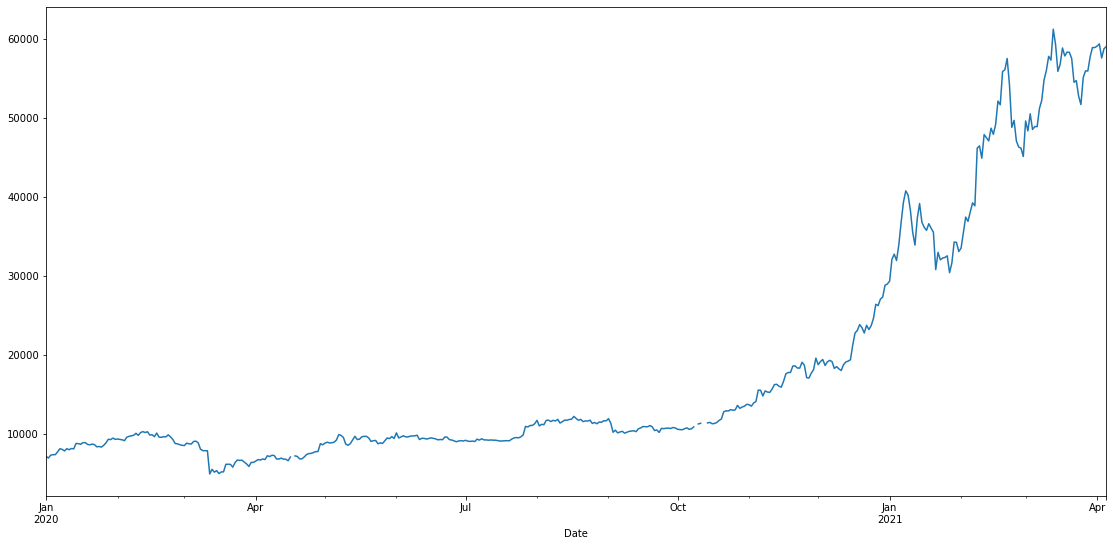

In [229]:
url = "https://github.com/BivinSadler/Time-Series-for-Data-Science/blob/main/Data/Bitcoin.csv"
bitcoin = pd.read_html(url, parse_dates=True, index_col=1)[0]['Adj Close']
bitcoin.plot(figsize=(19, 9));

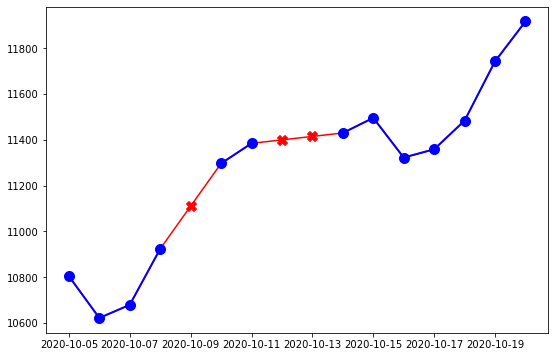

In [279]:
data = bitcoin["2020-10-5":"2020-10-20"]
interpolated = data.interpolate()
missed = interpolated[data.isna()]

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(missed.index, missed, marker="X", s=100, color='red')
ax.plot(interpolated, color='red')
ax.plot(data, marker="o", color='blue', lw=2, markersize=10);

plt.show()

### 1.4.1.3 Data that Require Cleaning and Wrangling
The New York City Taxicab information is available on the website www1.nyc.gov/site/tlc/about/about-tlc.page which is shown in Figure 1.21.  In 
order to access the data, use the following steps:
- On the homepage select *Data and Research*.
- Select *Data* and then *Aggregated Reports*.
- Select *Monthly Data Reports(CSV)* near the bottom of the screen

 The file `data_reports_monthly.csv` will be downloaded. 

In [75]:
url = "https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv"
NYCabRaw = pd.read_csv(url, index_col=0, parse_dates=True)
NYCabRaw.columns = [c.strip().replace(" ", "_").lower() for c in NYCabRaw.columns]
NYCabRaw

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,avg_minutes_per_trip,percent_of_trips_paid_with_credit_card,trips_per_day_shared
Month/Year,,,,,,,,,,,,,
2022-07-01,Yellow,"102,052","1,921,789","9,843","7,156","5,702",24.70,8.91,20.83,7.68,15.13,78%,0
2022-07-01,Green,"2,070","37,356",975,939,467,15.42,3.42,15.02,3.39,15.69,68%,0
2022-07-01,FHV - High Volume,"563,347",NULL,"73,321","71,036","46,798",20.40,6.50,20.10,6.40,19.00,-,853
2022-06-01,FHV - Livery,"21,637",NULL,"4,608","4,467","3,013",20.20,5.20,20.00,5.10,20.00,-,-
2022-06-01,FHV - Lux Limo,"1,155",NULL,"1,479","1,382",534,11.60,2.10,11.20,2.10,70.00,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-01,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.60,14.80,22.70,8.30,-,35%,-
2010-04-01,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.90,14.80,22.30,8.30,-,35%,-
2010-03-01,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.40,15.10,20.40,8.30,11.50,35%,-


“Wrangling” the dataset, in this context, involves filtering and subsetting the data to obtain the appropriate number of columns and rows (months). This will involve:
#### (a) Selecting only the Month.Year, License.Class and Trips.Per.Day columns


In [76]:
NYCabRaw = NYCabRaw[['license_class', "trips_per_day"]]
NYCabRaw

,license_class,trips_per_day
Month/Year,,
2022-07-01,Yellow,"102,052"
2022-07-01,Green,"2,070"
2022-07-01,FHV - High Volume,"563,347"
2022-06-01,FHV - Livery,"21,637"
2022-06-01,FHV - Lux Limo,"1,155"
...,...,...
2010-05-01,Yellow,"499,374"
2010-04-01,Yellow,"504,798"
2010-03-01,Yellow,"415,567"


#### (b) Filtering the Data to Retain Only the Yellow Taxicabs

In [77]:
NYCabTips = NYCabRaw.loc[NYCabRaw.license_class=="Yellow", "trips_per_day"]
NYCabTips

Month/Year
2022-07-01     102,052 
2022-06-01     105,385 
2022-05-01     115,449 
2022-04-01     119,629 
2022-03-01     116,629 
                ...    
2010-05-01     499,374 
2010-04-01     504,798 
2010-03-01     415,567 
2010-02-01     397,969 
2010-01-01     479,376 
Name: trips_per_day, Length: 151, dtype: object

#### (c) Deleting the Comma from the Trips.Per.Day Column

In [79]:
NYCabTips = NYCabTips.str.replace(",", "").astype(np.int64)
NYCabTips

Month/Year
2022-07-01    102052
2022-06-01    105385
2022-05-01    115449
2022-04-01    119629
2022-03-01    116629
               ...  
2010-05-01    499374
2010-04-01    504798
2010-03-01    415567
2010-02-01    397969
2010-01-01    479376
Name: trips_per_day, Length: 151, dtype: int64

#### (d) Reversing the Trips.Per.Day Column to Reorder the Data from Earliest to Latest Dates

In [80]:
NYCabTips.sort_index(inplace=True)
NYCabTips

Month/Year
2010-01-01    479376
2010-02-01    397969
2010-03-01    415567
2010-04-01    504798
2010-05-01    499374
               ...  
2022-03-01    116629
2022-04-01    119629
2022-05-01    115449
2022-06-01    105385
2022-07-01    102052
Name: trips_per_day, Length: 151, dtype: int64

#### (e) Subsetting the Dataset to Only Include the Data from January 2019 through December 2020

In [81]:
NYCabTips = NYCabTips['2019-1':'2020-12']
NYCabTips

Month/Year
2019-01-01    247315
2019-02-01    250654
2019-03-01    252634
2019-04-01    247742
2019-05-01    244017
2019-06-01    231335
2019-07-01    202443
2019-08-01    194798
2019-09-01    217747
2019-10-01    231171
2019-11-01    227654
2019-12-01    220786
2020-01-01    206604
2020-02-01    217216
2020-03-01     96993
2020-04-01      7928
2020-05-01     11237
2020-06-01     18325
2020-07-01     25816
2020-08-01     32491
2020-09-01     44646
2020-10-01     54221
2020-11-01     50285
2020-12-01     47145
Name: trips_per_day, dtype: int64

<AxesSubplot:xlabel='Month/Year'>

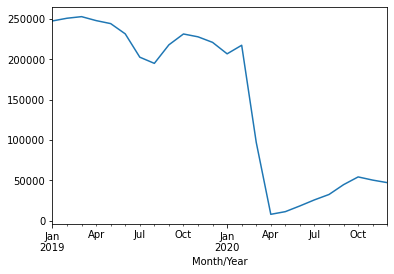

In [82]:
NYCabTips.plot()

<AxesSubplot:xlabel='Month/Year'>

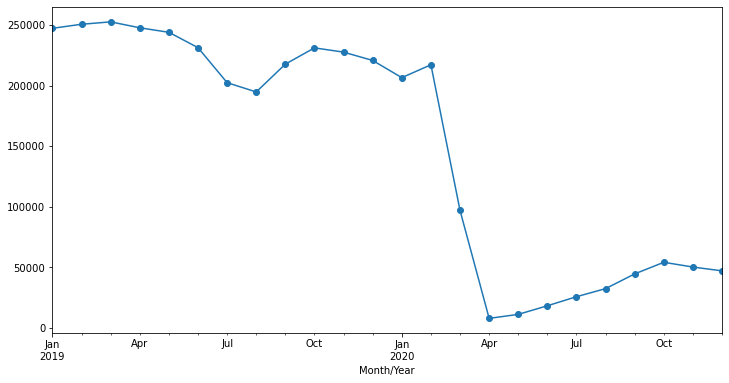

In [87]:
url = "https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv"
NYCabRaw = pd.read_csv(
    url, index_col=0, parse_dates=True, usecols=[0, 1, 2], thousands=","
).sort_index()
NYCabRaw.columns = [c.strip().replace(" ", "_").lower() for c in NYCabRaw.columns]
NYCabTips = NYCabRaw.loc[NYCabRaw.license_class=="Yellow", "trips_per_day"]
NYCabTips['2019-1':'2020-12'].plot(marker="o", figsize=(12, 6))

In [88]:
a1 = np.random.rand(4).shape
a2 = np.random.rand(4, 1).shape
a3 = np.array([[1, 2, 3, 4]]).shape
a4 = np.arange(1, 4, 1).shape
a5 = np.linspace(1 ,4, 4).shape

a1, a2, a3, a4, a5

((4,), (4, 1), (1, 4), (3,), (4,))

In [93]:
s = """
Office of Research Administration: (734) 647-6333 | 4325 North Quad
Office of Budget and Financial Administration: (734) 647-8044 | 309 Maynard, Suite 205
Health Informatics Program: (734) 763-2285 | 333 Maynard, Suite 500
Office of the Dean: (734) 647-3576 | 4322 North Quad
UMSI Engagement Center: (734) 763-1251 | 777 North University
Faculty Adminstrative Support Staff: (734) 764-9376 | 4322 North Quad"""

pat = r"[(]\d{3}[)]\s\d{3}[-]\d{4}"
re.findall(pat, s)

['(734) 647-6333',
 '(734) 647-8044',
 '(734) 763-2285',
 '(734) 647-3576',
 '(734) 763-1251',
 '(734) 764-9376']

In [98]:
import pandas as pd
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj1 = pd.Series(sdata)
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj2 = pd.Series(sdata, index=states)
obj3 = pd.isnull(obj2)

In [105]:
df = pd.DataFrame(pd.concat([obj1, obj2]), columns=['value'])
df

,value
Ohio,35000.0
Texas,71000.0
Oregon,16000.0
Utah,5000.0
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


In [106]:
df.where(df.value ==35000)

,value
Ohio,35000.0
Texas,NaN
Oregon,NaN
Utah,NaN
California,NaN
Ohio,35000.0
Oregon,NaN
Texas,NaN


In [108]:
d = {'1': 'Alice','2': 'Bob','3': 'Rita','4': 'Molly','5': 'Ryan'}
S = pd.Series(d)
S

1    Alice
2      Bob
3     Rita
4    Molly
5     Ryan
dtype: object

In [110]:
S.iloc[0:2]

1    Alice
2      Bob
dtype: object

In [111]:
S.iteritems()